# Pre-Modelling: Data Preprocessing and Feature Exploration
# in Python.

 **Goal.**
 - Goal:
     - Pre-modelling/modelling is 80%/20% of work.
     - Show the importance of data processing, feature exploration, and \
       feature engineering on modelling performance.
     - Go over a few effective pre-modelling steps.
     - This is only a small subset of pre-modelling.
 - Format:
     - Tutorial style.
     - Walk through concepts and code (and point out libraries).
     - Use an edited version of the 'adult' dataset (to predict income) with \
       the objective of buliding a binary classification model.
 - Python libraries:
     - Numpy.
     - Pandas.
     - Scikit Learn.
     - Matplotlib.
     - Almost all work flow is covered by these four libraries.
     
Source of 'adult' dataset: (http://archive.ics.uci.edu/ml/datasets/Adult).

# Agenda

1. Modelling Overview.
2. Introduce the Data.
3. Basic Data Cleaning.
    1. Dealing with data types.
    2. Handling missing data.
4. More Data Exploration
    1. Outlier detection.
    2. Plotting distributions.
5. Feature Engineering
    1. Interactions between features.
    2. Dimensionality reduction using PCA.
6. Feature Selection and Model Building.
    

In [1]:
# Part 1: Modelling Overview

__Review of predictive modelling__
- __definition__
    - Statistical technique to predict unknown outcomes.
    - Example used in this Notebook
        - Binary classification model - determine the probability that \
        an observation belong to one of two groups. 
        - Examples
            - Wheather a person votes for one of two political candidates.
            - Whether a credit card transaction is fraud.
            - Whether or not a person will be diagnosed with a given disease \
            in the next year.
- __Data terminology__
    - Inputs - independent variables (also called features)
        - Predictors.
    - Outputs - Dependent variable (also called the outcome)
        - The target variable  for prediction.
    - Models explain the effect that features have on the outcome.
- __Assessing model performance__
    - Randomly split observations into train/test sets.
    - Build model on train set and assess performance on test set.
    - AUC (Area Under the Curve) of ROC (Receiver Operating Characteristic) \
    is a common performance metric
        - True positive versus false positive rates.
- __Types of models for binary classification__
    - Logistic regression
    - Random forest
    - Gradient boosted trees
    - Support vectore machines
    - and so on.

# Part 2: Introduce the Data

Task: Given attributes about a person, predict whether their income is <=50000 or >50000.

In [2]:
# Import data and take a look.
import numpy as np
import pandas as pd

user_cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income' ]

# Note: 'r' allows backslashes (and forward slashes) in the file path name.
df = pd.read_csv(r'D:\My Documents\Python Code\Data Preprocessing/adult.csv', na_values=['#NAME?'], names=user_cols)

# First remove whitespace. (I'm not sure why there's a leading whitespace character!).
for col in user_cols:
    # print('df type:',df[col].dtype )
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(' ','')

print(df.head(5))

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [3]:
# How much data is missing? No data is missing!!

df.isnull().sum(axis = 0).sort_values(ascending=False).head()

income            0
native_country    0
hours_per_week    0
capital_loss      0
capital_gain      0
dtype: int64

In [4]:
# Insert 107 missing values into 'fnlwgt',
# 57 missing values in 'education_num',
# and 48 missing values in 'age'.
import random

random.seed(12)

num_rows = df.shape[0]
print('num_rows: ', num_rows)

def gen_rand_list(limit, num_rows):
    RandomListOfIntegers = [random.randrange(num_rows) for iter in range(limit)]
    return RandomListOfIntegers

fnlwgt_nan_indices = gen_rand_list(107, num_rows)
ed_num_nan_indices = gen_rand_list(57, num_rows)
age_nan_indices = gen_rand_list(48, num_rows)

df.loc[fnlwgt_nan_indices, 'fnlwgt'] = np.nan
df.loc[ed_num_nan_indices, 'education_num'] = np.nan
df.loc[age_nan_indices, 'age'] = np.nan

num_rows:  32561


In [5]:
# How much data is missing now?
df.isnull().sum(axis = 0).sort_values(ascending=False).head()

fnlwgt            107
education_num      57
age                48
income              0
native_country      0
dtype: int64

In [6]:

# Take a look at the variable 'income'.
print(df['income'].value_counts())


<=50K    24720
>50K      7841
Name: income, dtype: int64


In [7]:
# Assign outome as 0 if income is <=50K, and 1 if income is >50K.

df['income'] = [0 if x ==  '<=50K' else 1 for x in df['income']]

# Assign X as a Dataframe of features and y as a Series of outcomes.
X = df.drop('income', 1) # 1 indicates column.
y = df['income']

print(df['income'].value_counts())
print()

print(X.head(5))

0    24720
1     7841
Name: income, dtype: int64

    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  
0          2174             0              40  Unit

In [8]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


# Part 3: Basic Data Cleaning

__A. Dealing with data types__
- There are three main data types:
    - Numeric, e.g. income, age.
    - Categorical, e.g. gender, nationality.
    - Ordinal, e.g. low/medium/high.
    
- Models can only handle numeric features.

- Must convert ordinal and categorical features into numeric features.
    - Create dummy features.
    - Tranform a categorical feature into a set of dummy features, each representing
    a unique category.
    - In the set of dummy features, 1 indicates that the observation belongs to that category.

In [9]:
# Education is a categorical feature.
print(X['education'].head(5))

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object


In [10]:
# Use get_dummies in pandas.
# Another option: OneHotEncoder in sckit learn.
# Note: if you have K categories, then K-1 dummies are required.
# (Notice how 'Bachelors' column is missing below).

print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           0          0   
3     0     1     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4             0  


In [11]:
# Decide which categorical variables you want to use in the model.
# (Don't automatically convert them to dummy features).

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'' unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has '9'' unique categories
Feature 'education' has '16'' unique categories
Feature 'marital_status' has '7'' unique categories
Feature 'occupation' has '15'' unique categories
Feature 'relationship' has '6'' unique categories
Feature 'race' has '5'' unique categories
Feature 'sex' has '2'' unique categories
Feature 'native_country' has '42'' unique categories


In [12]:
# Although 'native_country' has a lot of unique categories, most categories
# only have a few observations.

print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

print(X['native_country'].head(10))

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
Name: native_country, dtype: int64
0    United-States
1    United-States
2    United-States
3    United-States
4             Cuba
5    United-States
6          Jamaica
7    United-States
8    United-States
9    United-States
Name: native_country, dtype: object


In [13]:
# In this case bucket low frequency events as 'Other'.

X['native_country'] = ['United-States' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States    29170
Other             3391
Name: native_country, dtype: int64


In [14]:
# Print the data type of each feature.
X.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
dtype: object

In [15]:
# Create a feature of lists to dummy.
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'] 

In [16]:
# Function to dummy all the categorical variables used for modelling.
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [17]:
X = dummy_df(X, todummy_list)
print(X.head(5))

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0          2174             0              40   
1  50.0   83311.0           13.0             0             0              13   
2  38.0  215646.0            9.0             0             0              40   
3  53.0  234721.0            7.0             0             0              40   
4  28.0  338409.0           13.0             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    0   
3            0                      0                    0   
4            0                      0                    0   

   workclass_Never-worked  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0                       0  ...                  0                   

In [18]:
for col in X.columns:
    print(col)

age
fnlwgt
education_num
capital_gain
capital_loss
hours_per_week
workclass_?
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital_status_Divorced
marital_status_Married-AF-spouse
marital_status_Married-civ-spouse
marital_status_Married-spouse-absent
marital_status_Never-married
marital_status_Separated
marital_status_Widowed
occupation_?
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-ser

__B. Handling missing data__
- Models cannot handle missing data.
- Simplest solution
    - Remove observations/features that have missing data.
- But, removing missing data can have lots of issues
    - If data is randomly missing: then potentially a lot of data is removed.
    - Data is not randomly missing: in addition to losing data  \
    biases may be introduced.
    - Ususally this is a poor solution.
- An alternate solution is to use imputation
    - Replace missing values with another value.
    - Strategies: mean, median, highest frequency of a given feature.


In [19]:
# How much data is missing? 

X.isnull().sum(axis = 0).sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_5th-6th        0
dtype: int64

In [20]:
# Insert 107 missing values into 'fnlwgt',,
# 57 missing values in 'education_num',
# and 48 missing values in 'age'.
#import random

#random.seed(12)

#num_rows = X.shape[0]
#print('num_rows: ', num_rows)

#def gen_rand_list(limit, num_rows):
#    RandomListOfIntegers = [random.randrange(num_rows) for iter in range(limit)]
#    return RandomListOfIntegers

#fnlwgt_nan_indices = gen_rand_list(107, num_rows)
#ed_num_nan_indices = gen_rand_list(57, num_rows)
#age_nan_indices = gen_rand_list(48, num_rows)

#X.loc[fnlwgt_nan_indices, 'fnlwgt'] = np.nan
#X.loc[ed_num_nan_indices, 'education_num'] = np.nan
#X.loc[age_nan_indices, 'age'] = np.nan

In [21]:
# How much data is missing now?
#X.isnull().sum(axis = 0).sort_values(ascending=False).head()

In [22]:
# Impute missing values using SimpleImputer in sklearn.impute.
import sklearn
from sklearn.impute import SimpleImputer

#imp = SimpleImputer(missing_values='NaN', strategy='median')
imp = SimpleImputer(missing_values=np.nan, strategy='median')

X['fnlwgt'] = imp.fit_transform(X['fnlwgt'].values.reshape(-1,1))[:,0]
X['education_num'] = imp.fit_transform(X['education_num'].values.reshape(-1,1))[:,0]
X['age'] = imp.fit_transform(X['age'].values.reshape(-1,1))[:,0]


In [23]:
# And how much data is missing now? None.
X.isnull().sum(axis = 0).sort_values(ascending=False).head()

native_country_United-States    0
education_Bachelors             0
education_1st-4th               0
education_5th-6th               0
education_7th-8th               0
dtype: int64

# Part 4: More Data Exploration

- A large part of pre-modelling and modelling workflow can be automated.
- But understanding the problem, domain, and data is extremely important  \
for building high performance models.
- This section covers some tools used for exploring data in order to make smarter decisions.

__A. Outlier detection__
- An outlier is an observation that deviates drastically from other observations in the dataset.
- Occurrence
    - Natural, e.g. Mark Zuckerberg's income.
    - Error, e.g. Human weight of 2000lb, due to mistyping an extra 0.
- Why are they problematic?
    - Naturally occurring:
        - Not necessarily problematic.
        - But can skew the model by affecting the slope (see image below).
    - Error
        - Indicative of data quality issues.
        - Treat in the same way as a missing value, i.e imputation.
- There are many approaches for detecting outliers. Two of these:
    - Tukey IQR.
    - Kernel density estimation.

In [24]:
# This code does not work!

# from IPython.display import Image
# Image(filename='outliers.jpg')

__Outlier detection - Tukey IQR (Inter-quartile range)__
- Identifies extreme values in data.
- Outliers are defined as:
    - Values below Q1 - 1.5(Q3-Q1) and above Q1 + 1.5(Q3-Q1).
- Standard deviation from the mean is another method for detecting extreme values
    - But it can be problematic:
        - Assumes normality.
        - Sensitive to extreme values.

In [25]:
# This code does not work!

# from IPython.display import Image
# Image(filename='tukeyipr.jpg')

In [26]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [27]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79.
 79. 79. 79. 79. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 82. 82. 82. 82. 82. 82. 82. 82.
 82. 82. 82. 82. 83. 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84.
 84. 84. 85. 85. 85. 86. 87. 88. 88. 88. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]


__Outlier detection - kernel density estimation__
- Non-parametric way to estimate the probability density function of a given feature.
- Can be advantageous compared to exterem value detection (e.g. Tukey IQR).
    - Captures outliers in bi-model distributions.

In [28]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [29]:

kde_indices, kde_values = find_outliers_kde(X['age'][:5000]) # Use a subset of the data for illustrative purposes.

# kde_indices, kde_values = find_outliers_kde(X['age']) # This takes too long to process!
print(np.sort(kde_values))

[69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 70. 70. 70. 70. 70.
 70. 70. 70. 70. 70. 71. 71. 71. 71. 71. 71. 71. 71. 71. 71. 72. 72. 72.
 72. 72. 72. 72. 72. 72. 72. 72. 72. 73. 73. 73. 73. 73. 73. 73. 74. 74.
 74. 74. 74. 74. 74. 74. 74. 74. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75. 76. 76. 76. 76. 76. 76. 76. 76. 76. 77. 77. 77. 77. 77. 78. 78.
 79. 79. 79. 80. 80. 80. 81. 81. 81. 81. 82. 83. 88. 90. 90. 90. 90. 90.
 90. 90.]


__B. Distribution of Features__
- A histogram is a simple representation of the distribution of values of a given feature.
- X-axis represents value bins and y-axis represents the frequency of an observations falling in that bin.
- It is interesting to look at distributions by outcome categories.

In [30]:
# Use pyplot in matplotlib to plot histograms.
%matplotlib inline

import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

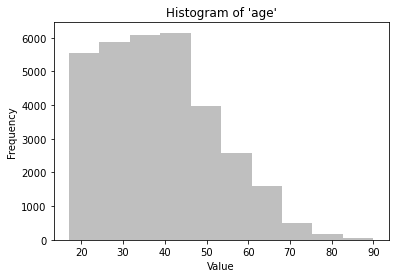

<class 'pandas.core.series.Series'>


In [31]:
plot_histogram(X['age'])
print(type(X['age']))

In [32]:
# Plot histograms to show distributions of features by 
# dependent variable (DV) categories.

def plot_histogram_dv(x, y):
    plt.hist(list(x[y==0]), color='blue', alpha=0.5, label='DV=0') # y=0 -> <=50K.
    plt.hist(list(x[y==1]), color='red', alpha=0.5, label='DV=1') # y=1 -> >50K.
    plt.title("Histogram of '{var_name}' by DV category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

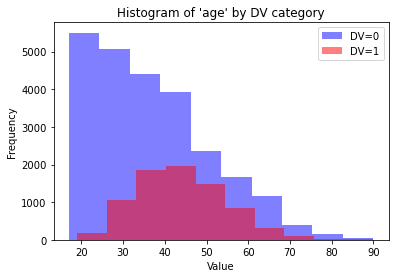

In [33]:
plot_histogram_dv(X['age'], y)


# Part 5: Feature Engineering

__A. Interactions amongst features__
- A simple two-way interaction is represented by:-
    - X3 = X1*X2 where X3 is the interaction between X1 and X2.
- Can add interaction terms as additional new feature to you model; useful for the  \
model if the impact of two or more features on the outcome is non-additive.

- Example
    - Interaction: education and political ideology; outcome: concerns about climate change.
    - While an increase in education amongst liberals or moderates increases concerns about  \
    climate change, an increase in education amongst conservatives has the opposite effect. 
    - The education/political ideology interaction captures more than two features alone.
    
- Note that the interaction amongst dummy variables belonging to the same categorical features \
are always zero.

- Although it is easy to calculate two-way interactions amongst all features, it is very  \
computationally expensive. ('f choose 2' combinations,  which is approximately 0.5*f^2).
    - 10 features = 45 two-way interaction terms.
    - 50 features = 1225 two-way interaction terms.
    - 100 features = 4950 two-way interaction terms.
    - 500 features = 124750 two-way interaction terms.
    - It is recommended to understand your data and domain if possible, and selectively  \
    choosing interaction terms.

In [34]:
# This code doesn't work.
#from IPython.display import Image
#Image(filename='interactions.jpg')

In [35]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions
# for all features.
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names.
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions.
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interactions with all zero values.
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df


In [36]:
X = add_interactions(X)
print(X.head())

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0        2174.0           0.0            40.0   
1  50.0   83311.0           13.0           0.0           0.0            13.0   
2  38.0  215646.0            9.0           0.0           0.0            40.0   
3  53.0  234721.0            7.0           0.0           0.0            40.0   
4  28.0  338409.0           13.0           0.0           0.0            40.0   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0          0.0                    0.0                  0.0   
1          0.0                    0.0                  0.0   
2          0.0                    0.0                  0.0   
3          0.0                    0.0                  0.0   
4          0.0                    0.0                  0.0   

   workclass_Never-worked  ...  race_Other_native_country_Other  \
0                     0.0  ...                              0.0   
1           

__B. Dimensionality reduction using PCA__
- Principal component analysis (PCA) is a technique that transforms a dataset of many
features into principal components that 'summarise' the varaince that underlies the data.
- Each principal component is calculated by finding the linear combination of features
that maximises variance, while also ensuring zero correlation with previously calculated
principal components.
- Use cases for modelling:
    - One of the most common dimensionality reduction techniques.
    - Use if there are too many features or if observation/feature ratio is poor.
    - Also, potentially good option if there are a lot of highly correlated variables
    in the dataset.
- Unfortunately PCA makes it a lot harder interpret models. 

In [37]:
# This code does not work!
#from IPython.display imort Image
#Image(filename='pca.jpg')

In [38]:
# Use PCA from sklearn.decomposition to find PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [39]:
print(X_pca.head())

              0             1             2             3             4  \
0 -3.634024e+07 -1.620506e+07 -6.087969e+06  1.421959e+04  5.875575e+04   
1 -2.048602e+08 -1.642474e+07 -6.695304e+06  2.216828e+06  3.097008e+05   
2 -2.048565e+08 -1.635117e+07  1.618294e+06  6.900740e+04 -1.620826e+05   
3 -2.048550e+08 -1.632061e+07  4.974186e+06  2.695625e+06 -9.005131e+05   
4 -2.048543e+08 -1.630839e+07  6.411832e+06 -2.374495e+06  1.512068e+06   

              5              6              7              8              9  
0 -41977.957346    2867.357378   30124.446039 -111562.122385   33812.006475  
1  31929.606106 -141803.574604   43061.102252  -41859.551663   19771.552321  
2  16115.312688   98048.733523 -126131.727667  -57558.071315  165056.379005  
3  13583.174253 -129154.464124  -42108.369454   23566.803932    1198.341200  
4 -49585.155628  -10056.881994  464423.095453  178347.834985   30251.016764  


# Part 6: Feature Selection and Model Building

__Build model using processed data__


In [40]:
# Use train_test_spilt in sklearn.model_selection to split data into tain and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [41]:
# The total number of features has grown substantially after dummying and adding interaction terms.

print(df.shape)
print(X.shape)

(32561, 15)
(32561, 1863)


In [42]:
# Such a large set of features can cause overfitting and slow computations.
# Use feature selection to choose the most important features.

import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\David Brookes\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 491  492  588  591  595  768  801  806  808  815  818  948 1191 1192
 1328 1356 1420 1423 1425 1603] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\David Brookes\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [43]:
print(colnames_selected)

['education_num', 'marital_status_Married-civ-spouse', 'relationship_Husband', 'age_education_num', 'age_marital_status_Married-civ-spouse', 'age_relationship_Husband', 'fnlwgt_marital_status_Married-civ-spouse', 'fnlwgt_relationship_Husband', 'education_num_hours_per_week', 'education_num_marital_status_Married-civ-spouse', 'education_num_relationship_Husband', 'hours_per_week_marital_status_Married-civ-spouse', 'hours_per_week_relationship_Husband', 'marital_status_Married-civ-spouse_relationship_Husband', 'marital_status_Married-civ-spouse_race_White', 'marital_status_Married-civ-spouse_sex_Male', 'marital_status_Married-civ-spouse_native_country_United-States', 'relationship_Husband_race_White', 'relationship_Husband_sex_Male', 'relationship_Husband_native_country_United-States']


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [45]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.6355458726411575


__Build model using unprocessed data__

In [46]:
# Drop missing values so that model does not throw an error.
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(32561, 15)
(32349, 15)


In [47]:
# Remove non-numeric columns so model does not throw an error.
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','float32', 'int64','float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)
        
print(df.shape)
print(df_unprocessed.shape)
        

(32561, 15)
(32349, 7)


In [48]:
# Split into features and outcomes.
X_unprocessed = df_unprocessed.drop('income', 1)
y_unprocessed = df_unprocessed['income']

In [49]:
# Take a look again at the what the unprocessed feature set looks like.
print(X_unprocessed.head())

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0  39.0   77516.0           13.0          2174             0              40
1  50.0   83311.0           13.0             0             0              13
2  38.0  215646.0            9.0             0             0              40
3  53.0  234721.0            7.0             0             0              40
4  28.0  338409.0           13.0             0             0              40


In [50]:
# Split unprocessed data into train and test sets.
# Build model and assess performance.

X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(
    X_unprocessed, y_unprocessed, train_size=0.7, random_state=1)
auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

0.5737688693424194


In [51]:
# Compare model performance.
print('AUC of model with data preprocessing: {auc}'.format(auc=auc_processed))
print('AUC of model without data preprocessing: {auc}'.format(auc=auc_unprocessed))
per_improve = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100 # Percentage improvement.
print('Model improvement of preprocessing: {per_improve}%'. format(per_improve=per_improve))

AUC of model with data preprocessing: 0.6355458726411575
AUC of model without data preprocessing: 0.5737688693424194
Model improvement of preprocessing: 10.766879592045301%
